In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from numpy.testing import assert_almost_equal

# Global constants
m = 1
A = 1
C_d = 1

In [3]:
def force_gravity(m, y):
    '''Calculate the force of gravity on an object.
    
    Parameters:
    
    m : mass of object [kg]
    y : distance above surface of earth [m]
    
    returns:
    
    F_g : force due to gravity [N]'''
    
    G = 6.6742*10**-11 # gravitational constant, Nm^2/kg^2
    M = 5.9722*10**24 # mass of earth, kg
    R = 6371*10**3 # radius of earth, m
    
    F_g = G*M*m/(y + R)**2
    return F_g

def air_density(y):
    '''Calculate (a close approximation of) the air density at a given 
    height.
    
    Parameters:
    
    y : height above sea level [m]
    
    Returns:
    
    rho : density at height h [kg/m^3]'''
    
    
    rho_0 = 1.225 # sea level density, kg/m^3
    L = 0.0065 # temperature lapse rate, K/m
    # Temperature is obviously NOT constant and this is a simplification
    T = 288.15 # temperature, K
    M = 0.0289644 # molar mass of dry air, kg/mol
    R = 8.31447 # ideal gas constant, J/(mol K)
    g = force_gravity(m, y)/m # acceleration due to gravity at height h [m/s^2]
    
    rho = rho_0 * np.exp(-g*M*y/(R*T))
    return rho
    
    

def force_drag(y, vx, vy, variable_density=True):
    '''Return the drag force the object experiences during flight.
    
    Parameters:
    
    v : velocity [m/s]
    h : height [m]
    
    Returns:
    
    F_drag: force due to drag [N]'''
    
    rho = air_density(y)
    
    # for testing purposes
    if not variable_density:
        rho = 1.16
    
    b = 1/(2*m) * rho * A * C_d
        
    F_drag_x = b*np.sqrt(vx**2 + vy**2)*vx
    F_drag_y = b*np.sqrt(vx**2 + vy**2)*vy
    
    return F_drag_x, F_drag_y

def print_init(init):
    print('INITIAL CONDITIONS')
    print('x =', init[0])
    print('y =', init[1])
    print('vx =', init[2])
    print('vy =', init[3])
    

INITIAL CONDITIONS
x = 0.0
y = 78.4
vx = 0.0
vy = 0.0
Time at which the object hits the ground: 3.99592195922


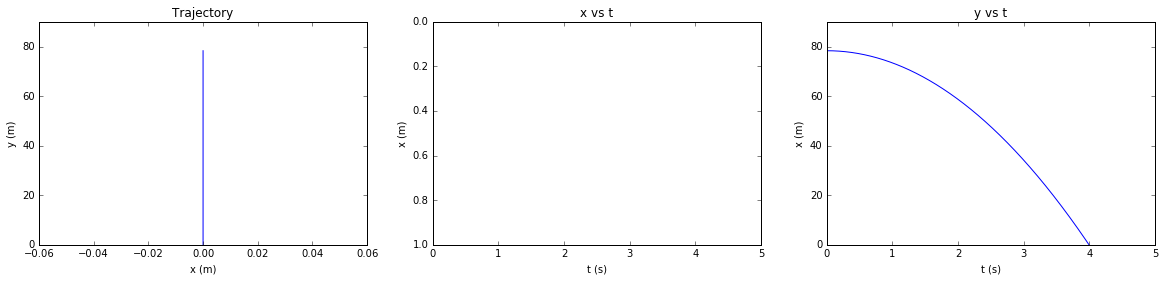

INITIAL CONDITIONS
x = 0.0
y = 1960.0
vx = 0.0
vy = 0.0
Time at which the object hits the ground: 19.9844398444


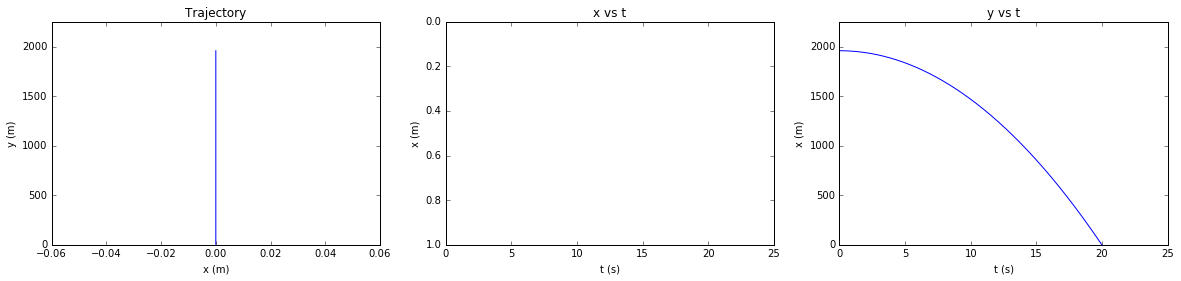

INITIAL CONDITIONS
x = 0.0
y = 196000.0
vx = 0.0
vy = 0.0
Time at which the object hits the ground: 204.911349113


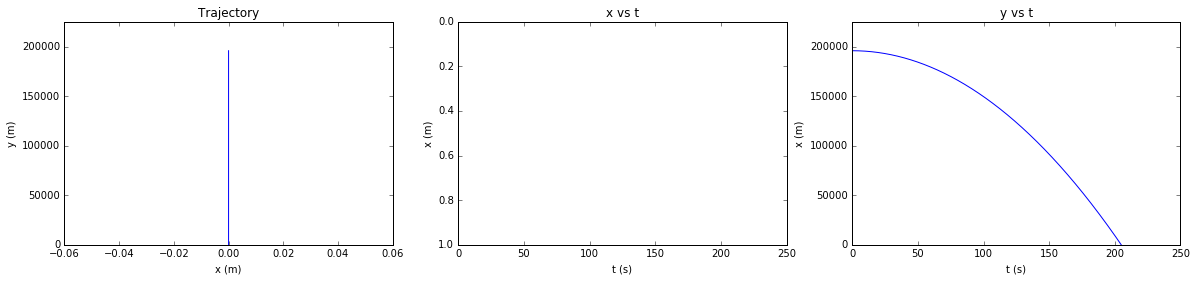

INITIAL CONDITIONS
x = 0.0
y = 864360.0
vx = 0.0
vy = 0.0
Time at which the object hits the ground: 466.824168242


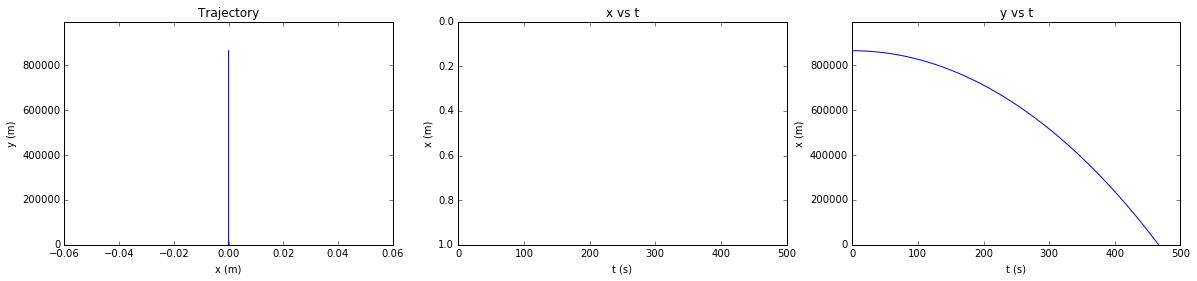

In [19]:
def x_acceleration1():
    return 0

def y_acceleration1(y):
    return -force_gravity(m, y)/m

def F1(init, T):
    '''Function to be integrated.'''
    
    x, y = init[0], init[1]
    vx, vy = init[2], init[3]
    ax, ay = x_acceleration1(), y_acceleration1(y)
    
    return np.array([vx, vy, ax, ay])

def test_F1(init, t_max, N):
    '''The only force considered here is gravity (non-constant)'''
    
    T = np.linspace(0, t_max, N)
    
    data = odeint(F1, init, T)
    x, y, vx, vy = data[:,0], data[:, 1], data[:,2], data[:,3]
    
    x_max = max(x)
    y_max = max(y)
    
    # finding the time at which the object hits the ground
    y_min = min(val for val in y if val > 0)
    index_ground = list(y).index(y_min)
    print('Time at which the object hits the ground:', T[index_ground])
    
    plt.figure(figsize=(20,4))
    
    plt.subplot(1,3,1)
    plt.plot(x, y)
    plt.title('Trajectory')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.ylim(0, y_max*1.15)

    plt.subplot(1,3,2)
    plt.plot(T, x)
    plt.title('x vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.ylim(1, x_max*1.15)

    plt.subplot(1,3,3)
    plt.plot(T, y)
    plt.title('y vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.ylim(0, y_max*1.15)
    plt.show()
    
def plot_test_F1():
    # If we drop an object from a height of 1/2 * g * t_ground**2, it should hit the ground at time t_ground...that is,
    # if g is constant. If our initial height is very large, then it should take longer than t_ground to hit the ground.
    t_ground1 = 4
    t_ground2 = 20
    t_ground3 = 200
    t_ground4 = 420

    init1 = np.array([0, 4.9*t_ground1**2, 0, 0])
    init2 = np.array([0, 4.9*t_ground2**2, 0, 0])
    init3 = np.array([0, 4.9*t_ground3**2, 0, 0])
    init4 = np.array([0, 4.9*t_ground4**2, 0, 0])

    print_init(init1)
    test_F1(init1, t_ground1*1.15, 100000)

    print_init(init2)
    test_F1(init2, t_ground2*1.15, 100000)

    print_init(init3)
    test_F1(init3, t_ground3*1.15, 100000)

    print_init(init4)
    test_F1(init4, t_ground4*1.15, 100000)
    
plot_test_F1()

INITIAL CONDITIONS
x = 0
y = 3000
vx = 10
vy = 10
Max range with variable air density: 4.18771407564
Max range with constant air density: 3.29199634977


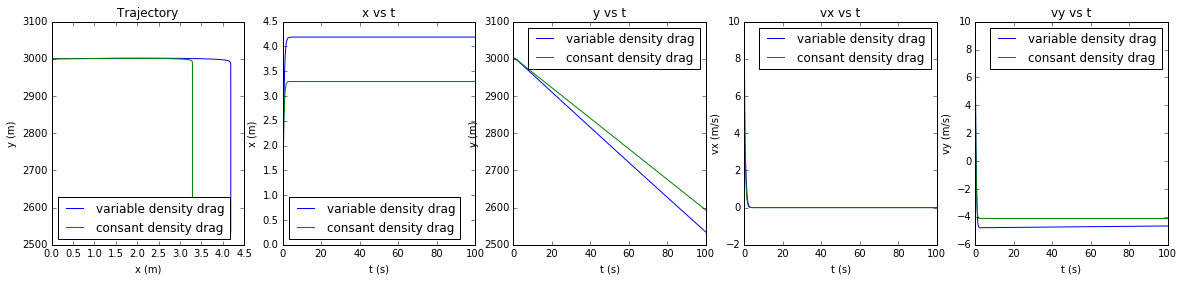

INITIAL CONDITIONS
x = 0
y = 5000
vx = 23
vy = 31
Max range with variable air density: 6.32389149614
Max range with constant air density: 3.97420538444


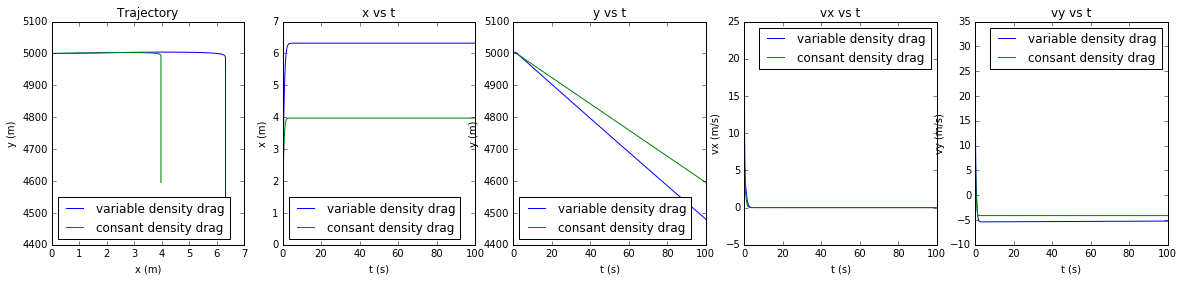

INITIAL CONDITIONS
x = 0
y = 2000
vx = 0
vy = 0
Max range with variable air density: 0.0
Max range with constant air density: 0.0


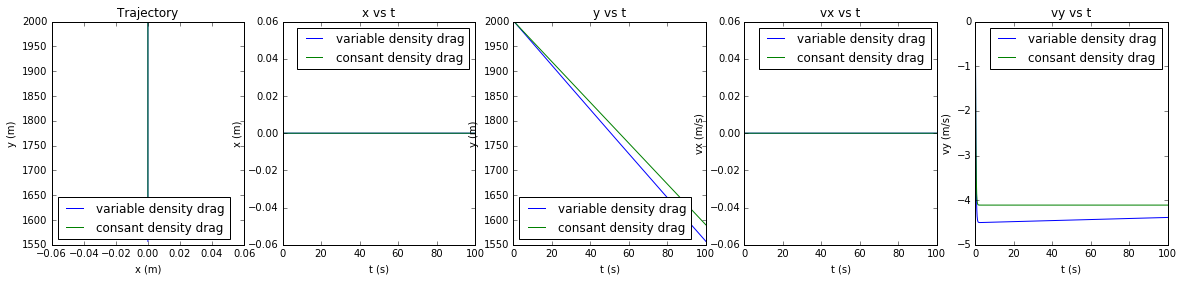

INITIAL CONDITIONS
x = 200
y = 4000
vx = 30
vy = 42
Max range with variable air density: 206.052430989
Max range with constant air density: 204.190077451


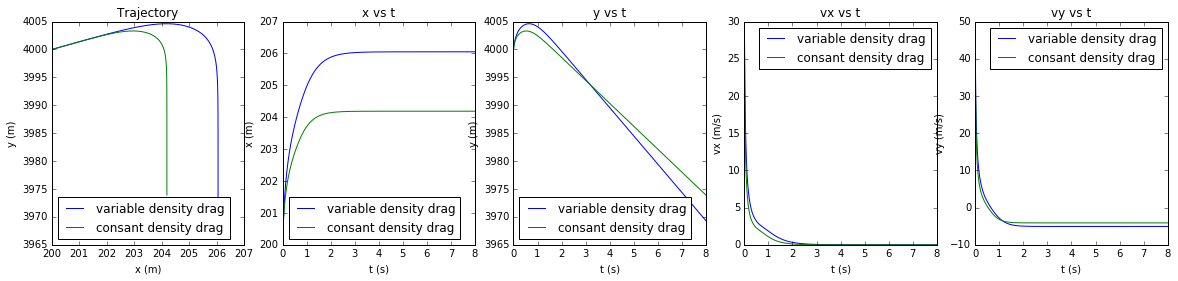

INITIAL CONDITIONS
x = 122
y = 60000
vx = 40
vy = 32
Max range with variable air density: 917.571167269
Max range with constant air density: 127.293242575


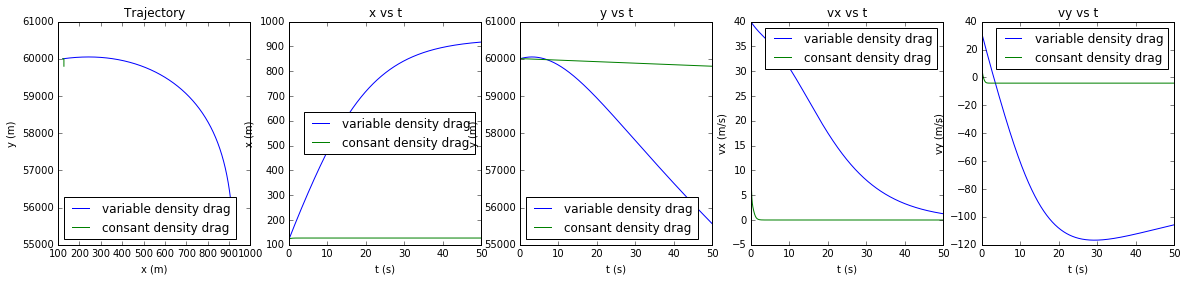

In [7]:
def x_acceleration2(y, vx, vy):
    '''Return the object's acceleration in the x direction due to gravity and drag.'''
    F_drag_x, F_drag_y = force_drag(y, vx, vy)
    return -F_drag_x/m

def y_acceleration2(y, vx, vy):
    '''Return the object's acceleration in the y direction due to gravity and drag.'''
    F_drag_x, F_drag_y = force_drag(y, vx, vy)
    return (-9.8 - F_drag_y)/m





def x_acceleration3(y, vx, vy):
    '''Return the object's acceleration in the x direction due to gravity and drag.'''
    F_drag_x, F_drag_y = force_drag(y, vx, vy,  variable_density=False)
    return -F_drag_x/m

def y_acceleration3(y, vx, vy):
    '''Return the object's acceleration in the y direction due to gravity and drag.'''
    F_drag_x, F_drag_y = force_drag(y, vx, vy,  variable_density=False)
    return (-9.8 - F_drag_y)/m






def F2(init, T):
    '''Function to be integrated.'''
    x, y = init[0], init[1]
    v_x, v_y = init[2], init[3]
    a_x, a_y = x_acceleration2(y, v_x, v_y), y_acceleration2(y, v_x, v_y)
    return np.array([v_x, v_y, a_x, a_y])

def F3(init, T):
    x, y = init[0], init[1]
    v_x, v_y = init[2], init[3]
    a_x, a_y = x_acceleration3(y, v_x, v_y), y_acceleration3(y, v_x, v_y)
    return np.array([v_x, v_y, a_x, a_y])

def test_F2_F3(init, t_max, N):
    T = np.linspace(0, t_max, N)

    data2 = odeint(F2, init, T)
    x2, y2, vx2, vy2 = data2[:,0], data2[:, 1], data2[:,2], data2[:,3]
    
    data3 = odeint(F3, init, T)
    x3, y3, vx3, vy3 = data3[:,0], data3[:, 1], data3[:,2], data3[:,3]
    
    plt.figure(figsize=(20,4))
    
    max_x2 = max(x2)
    max_x3 = max(x3)
    
    print('Max range with variable air density:', max_x2)
    print('Max range with constant air density:', max_x3)

    plt.subplot(1,5,1)
    plt.plot(x2, y2, label='variable density drag')
    plt.plot(x3, y3, label='consant density drag')
    plt.title('Trajectory')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend(loc='best')
    
    plt.subplot(1,5,2)
    plt.plot(T, x2, label='variable density drag')
    plt.plot(T, x3, label='consant density drag')
    plt.title('x vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    plt.legend(loc='best')
    
    plt.subplot(1,5,3)
    plt.plot(T, y2, label='variable density drag')
    plt.plot(T, y3, label='consant density drag')
    plt.title('y vs t')
    plt.xlabel('t (s)')
    plt.ylabel('y (m)')
    plt.legend(loc='best')

    plt.subplot(1,5,4)
    plt.plot(T, vx2, label='variable density drag')
    plt.plot(T, vx3, label='consant density drag')
    plt.title('vx vs t')
    plt.xlabel('t (s)')
    plt.ylabel('vx (m/s)')
    plt.legend(loc='best')
    
    plt.subplot(1,5,5)
    plt.plot(T, vy2, label='variable density drag')
    plt.plot(T, vy3, label='consant density drag')
    plt.title('vy vs t')
    plt.xlabel('t (s)')
    plt.ylabel('vy (m/s)')
    plt.legend(loc='best')
    plt.show()

init1 = np.array([0, 3000, 10, 10])
init2 = np.array([0, 5000, 23, 31])
init3 = np.array([0, 2000, 0, 0])
init4 = np.array([200, 4000, 30, 42])
init5 = np.array([122, 60000, 40, 32])

print_init(init1)
test_F2_F3(init1, 100, 10000)

print_init(init2)
test_F2_F3(init2, 100, 10000)

print_init(init3)
test_F2_F3(init3, 100, 10000)

print_init(init4)
test_F2_F3(init4, 8, 10000)

print_init(init5)
test_F2_F3(init5, 50, 10000)

INITIAL CONDITIONS
x = 0.0
y = 78.4
vx = 0.0
vy = 0.0


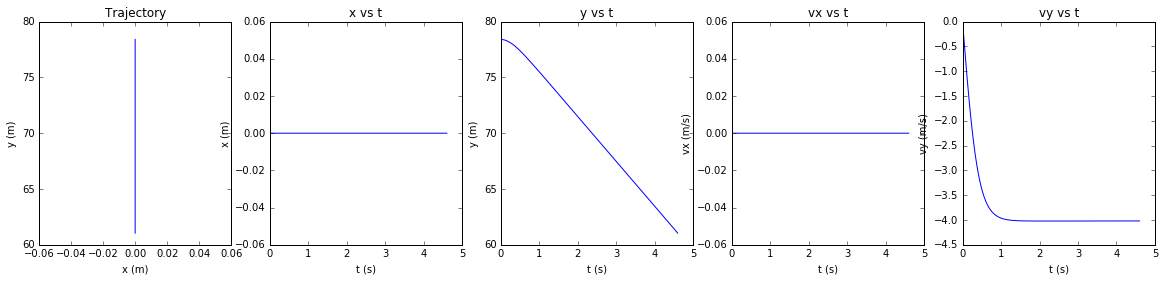

INITIAL CONDITIONS
x = 0.0
y = 1960.0
vx = 0.0
vy = 0.0


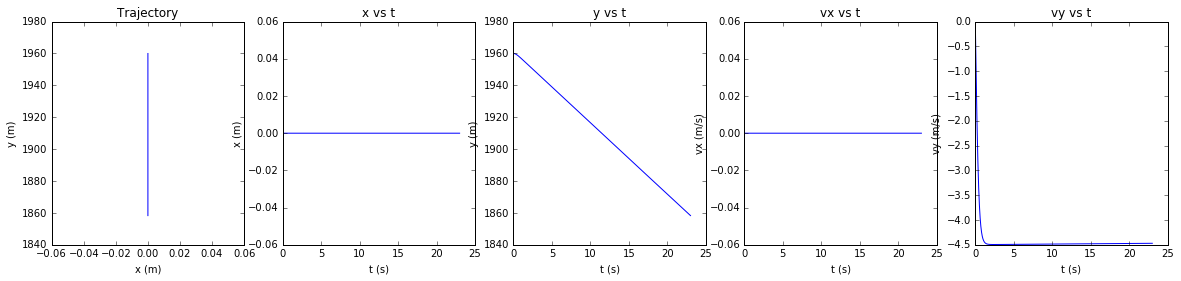

INITIAL CONDITIONS
x = 0.0
y = 196000.0
vx = 0.0
vy = 0.0


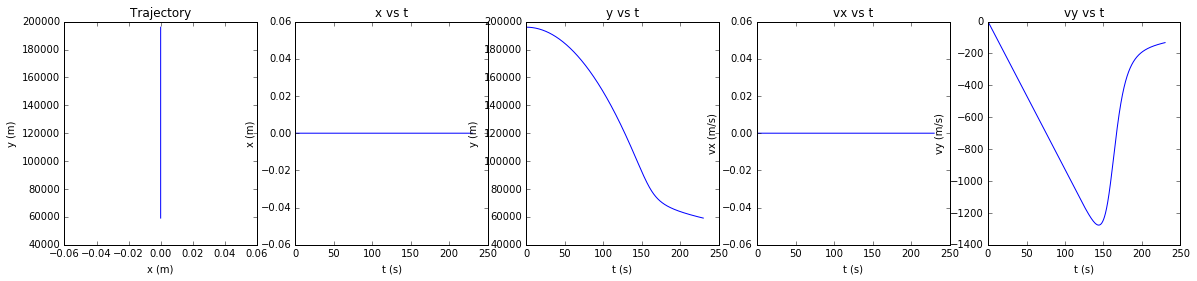

INITIAL CONDITIONS
x = 0.0
y = 864360.0
vx = 0.0
vy = 0.0


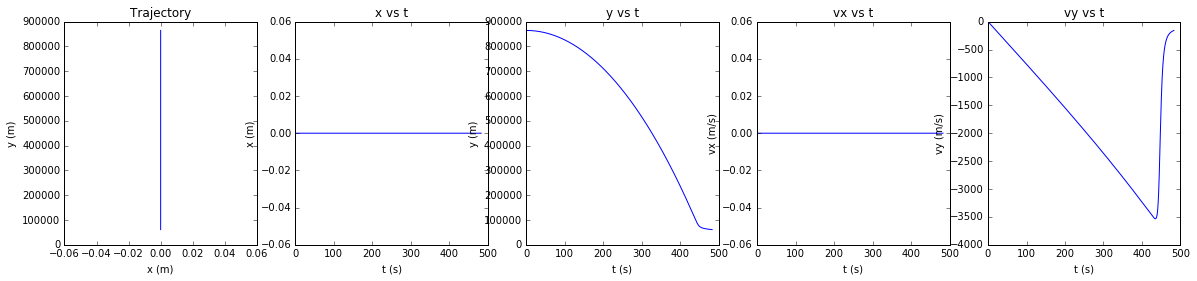

In [73]:
def x_acceleration4(y, vx, vy):
    F_drag_x, F_drag_y = force_drag(y, vx, vy)
    return -F_drag_x/m

def y_acceleration4(y, vx, vy):
    F_drag_x, F_drag_y = force_drag(y, vx, vy)
    return (-force_gravity(m, y) - F_drag_y)/m

def F4(init, T):
    '''Function to be integrated.'''
    
    x, y = init[0], init[1]
    vx, vy = init[2], init[3]
    ax, ay = x_acceleration4(y, vx, vy), y_acceleration4(y, vx, vy)
    
    return np.array([vx, vy, ax, ay])

def test_F4(init, t_max, N):
    
    T = np.linspace(0, t_max, N)
    
    data = odeint(F4, init, T)
    x, y, vx, vy = data[:,0], data[:, 1], data[:,2], data[:,3]
      
    plt.figure(figsize=(20,4))
    
    plt.subplot(1,5,1)
    plt.plot(x, y)
    plt.title('Trajectory')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    
    plt.subplot(1,5,2)
    plt.plot(T, x)
    plt.title('x vs t')
    plt.xlabel('t (s)')
    plt.ylabel('x (m)')
    
    plt.subplot(1,5,3)
    plt.plot(T, y)
    plt.title('y vs t')
    plt.xlabel('t (s)')
    plt.ylabel('y (m)')

    plt.subplot(1,5,4)
    plt.plot(T, vx)
    plt.title('vx vs t')
    plt.xlabel('t (s)')
    plt.ylabel('vx (m/s)')
    
    plt.subplot(1,5,5)
    plt.plot(T, vy)
    plt.title('vy vs t')
    plt.xlabel('t (s)')
    plt.ylabel('vy (m/s)')
    plt.show()
    
def plot_test_F4():
    # If we drop an object from a height of 1/2 * g * t_ground**2, it should hit the ground at time t_ground...that is,
    # if g is constant. If our initial height is very large, then it should take longer than t_ground to hit the ground.
    t_ground1 = 4
    t_ground2 = 20
    t_ground3 = 200
    t_ground4 = 420

    init1 = np.array([0, 4.9*t_ground1**2, 0, 0])
    init2 = np.array([0, 4.9*t_ground2**2, 0, 0])
    init3 = np.array([0, 4.9*t_ground3**2, 0, 0])
    init4 = np.array([0, 4.9*t_ground4**2, 0, 0])

    print_init(init1)
    test_F4(init1, t_ground1*1.15, 100000)

    print_init(init2)
    test_F4(init2, t_ground2*1.15, 100000)

    print_init(init3)
    test_F4(init3, t_ground3*1.15, 100000)

    print_init(init4)
    test_F4(init4, t_ground4*1.15, 100000)
    
plot_test_F4()

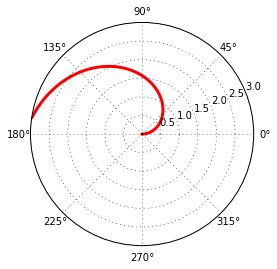

In [14]:
r = np.arange(0, 3.0, 0.01)
theta = r

plt.subplot(111, projection='polar')
plt.plot(theta, r, color='r', linewidth=3)
plt.grid(True)
plt.show()

In [ ]:
def polar_to_cartesian(r, theta, dr_dt, dtheta_dt):
    '''Converts polar to cartesian
    
    Parameters:
    r : radius [L]
    theta : angle [rad]
    dr_dt : radial velocity [L/T]
    dtheta_dt : angular velocity [L/T]
    
    Returns:
    array of x, y, vx, vy -- float
    [L], [L], [L/T], [L/T]
    
    '''

    x = r * np.cos(theta)
    y = r * np.sin(theta)
    dx_dt = dtheta_dt / r * np.cos(theta)
    dy_dt = -dtheta_dt / r * np.sin(theta)
    
    return np.array([x, y, vx, vy])

def cartesian_to_polar(x, y, dx_dt, dy_dt):
    '''Converts cartesian to polar
    
    Parameters
    x : [L]
    y : [L]
    dx_dt: [L/T]
    dy_dt: [L/T]
    
    Returns:
    array of r, theta, dr_dt, dtheta_dt -- float
    [L], [rad], [rad/T], [rad/T]
    
    '''
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    dr_dt = np.sqrt(dx_dt**2 + dy_dt**2) * np.cos(theta) #(x * dx_dt + y * dy_dt) / r # v  * cos(theta)
    dtheta_dt = np.sqrt(dx_dt**2 + dy_dt**2) - dr_dt
    
    return np.array([r, theta, dr_dt, dtheta_dt])